In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

!ls

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.download.n

In [2]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [3]:
#Initialing spark
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("CounterOfWords")\
    .getOrCreate()

In [4]:
spark = SparkSession.builder\
                    .master("local")\
                    .appName("word count")\
                    .config("spark.executor.heartbeatInterval", "3600s")\
                    .config("spark.network.timeout", "10000s")\
                    .getOrCreate()
sc = spark.sparkContext

In [5]:
text = sc.textFile("/content/GutenbergNovel1.txt," 
                   + "/content/GutenbergNovel10.txt," 
                   + "/content/GutenbergNovel2.txt," 
                   + "/content/GutenbergNovel3.txt," 
                   + "/content/GutenbergNovel4.txt," 
                   + "/content/GutenbergNovel5.txt," 
                   + "/content/GutenbergNovel6.txt," 
                   + "/content/GutenbergNovel7.txt," 
                   + "/content/GutenbergNovel8.txt," 
                   + "/content/GutenbergNovel9.txt")

In [6]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [7]:
text_cleaned = text.map(lower_clean_str)


In [8]:
text_count = text_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [9]:
df = text_count.toDF()
df1 = df.toPandas()

In [22]:
df1 = df1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['the', 'and', 'a', 'an', 'of', 'to', 'in', 'that', 'have', 'at', 'it', 'as', 'for', 'was', 'is', \
                'be', 'are', 'from', 'by', 'on', 'or', '', '–', 'were', 'with', 'their', 'some', 'her', 'more', \
                'but', 'this', 'there', 'said', 'has', 'had', 'not', 'its','the', 'and', 'a', 'of', 'to', 'in', 'that', 'as', 'for', 'was', 'is', \
                'be', 'are', 'from', 'by', 'on', 'or', '', '–', 'were','you','i','them','so','which','so','him','all','his','we','she']
df1 = df1[~df1['word'].isin(prepositions)]
df_final = df1.sort_values('count', ascending=False).head(10)
df_final


,word,count
97,die,3872
34745,der,3318
20120,ich,2372
34753,sie,2110
39502,zu,1935
44302,den,1781
24131,one,1587
34001,von,1586
34701,war,1583
983,das,1474


In [23]:
df1.count()


word     48130
count    48130
dtype: int64

In [26]:
import glob

read_files = glob.glob("/content/GutenbergNovel1.txt*.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

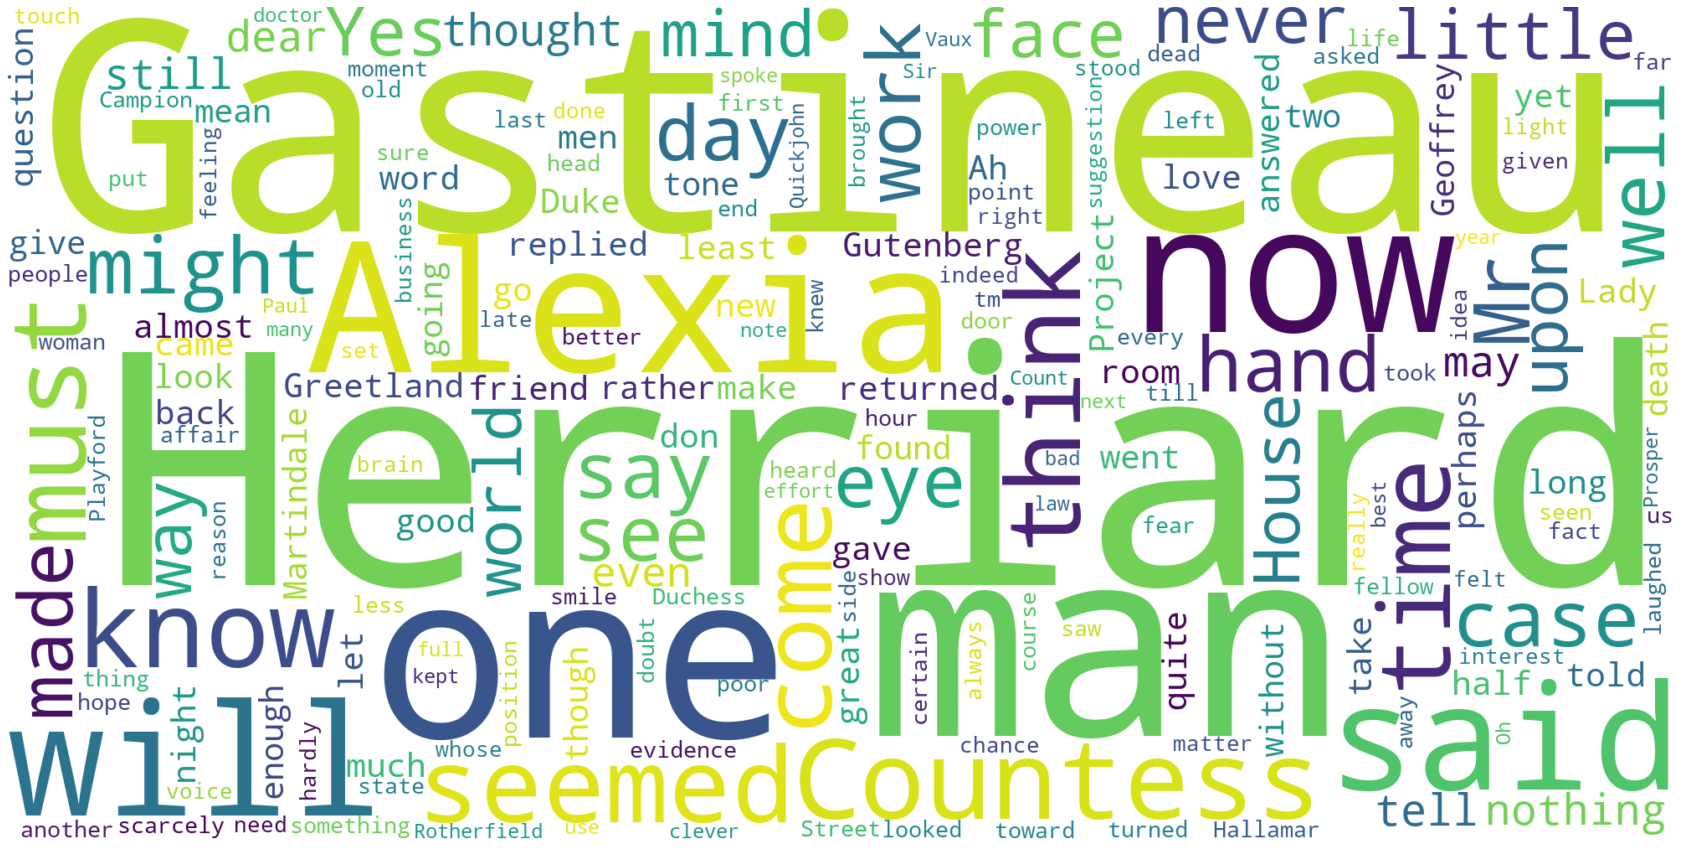

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Load text file
data = open("/content/GutenbergNovel1.txt", encoding="utf8").read()

# Create image
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, collocations=False, background_color="white", stopwords = STOPWORDS).generate(data)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()